In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [109]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 431.2+ KB


In [111]:
train_drop = train.drop(['casual','registered', 'count'], axis=1)
train_drop.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0


In [112]:
comb = pd.concat([train_drop, test])
comb.shape

(17379, 9)

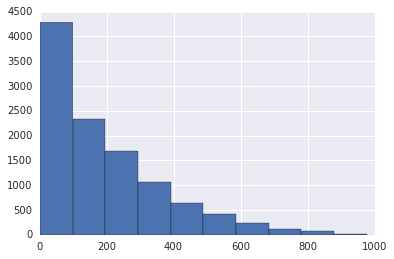

In [113]:
train['count'].hist()

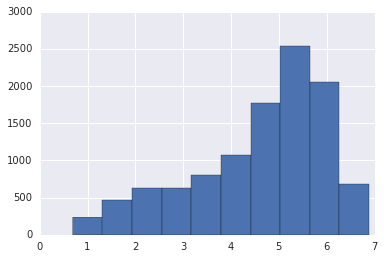

In [114]:
np.log1p(train['count']).hist()

In [115]:
comb['datetime'] = pd.to_datetime(comb.datetime, format='%Y-%m-%d %H:%M:%S')

In [116]:
comb['hour'] = comb.datetime.dt.hour
comb.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,4


In [117]:
comb.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,11.546752
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,6.914405
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,23.000000


In [118]:
comb.std()

season         1.106918
holiday        0.167165
workingday     0.465431
weather        0.639357
temp           7.894801
atemp          8.592511
humidity      19.292983
windspeed      8.196795
hour           6.914405
dtype: float64

In [119]:
thresh_std = 0.2
r, c = comb.shape

zero_list = []
for i in range(1, c):
    if(comb.iloc[:,i].std() < thresh_std):
        zero_list.append(comb.columns[i])

feature_cols = [col for col in comb.columns if col not in zero_list]
feature_cols, zero_list

(['datetime',
  'season',
  'workingday',
  'weather',
  'temp',
  'atemp',
  'humidity',
  'windspeed',
  'hour'],
 ['holiday'])

In [120]:
comb.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,-0.006117
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.000479
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.002285
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.020203
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.137603
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.133750
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.276498
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.137252
hour,-0.006117,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,1.000000


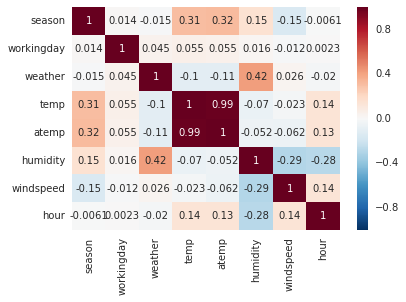

In [121]:
#plt.matshow(comb.corr())
import seaborn as sns
corr = comb[feature_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [122]:
# As we can see headmap, 'temp' and 'atemp' are highly correlated. 'atemp' should be removed
comb_final = comb[feature_cols].drop(['datetime', 'atemp'], 1)

In [123]:
comb_final.head()

,season,workingday,weather,temp,humidity,windspeed,hour
0,1,0,1,9.84,81,0.0,0
1,1,0,1,9.02,80,0.0,1
2,1,0,1,9.02,80,0.0,2
3,1,0,1,9.84,75,0.0,3
4,1,0,1,9.84,75,0.0,4


In [124]:
x_train = comb_final.iloc[:train.shape[0], :]
x_test = comb_final.iloc[train.shape[0]:, :]
y_train = train.loc[:,'count']
(x_train.shape, x_test.shape, y_train.shape)

((10886, 7), (6493, 7), (10886,))

In [125]:
y_train.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [126]:
train_final = pd.concat([x_train, y_train], 1)
train_final.head()

,season,workingday,weather,temp,humidity,windspeed,hour,count
0,1,0,1,9.84,81,0.0,0,16
1,1,0,1,9.02,80,0.0,1,40
2,1,0,1,9.02,80,0.0,2,32
3,1,0,1,9.84,75,0.0,3,13
4,1,0,1,9.84,75,0.0,4,1


In [127]:
def boxplot_count(feature):
    sns.boxplot(x = train_final[feature], y= train_final['count'])

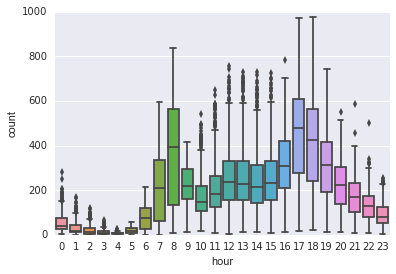

In [128]:
boxplot_count('hour')

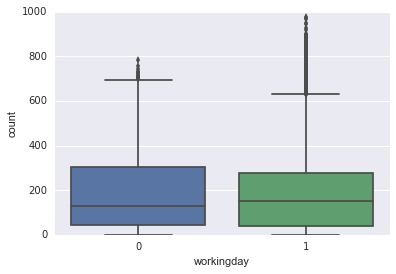

In [129]:
boxplot_count('workingday')

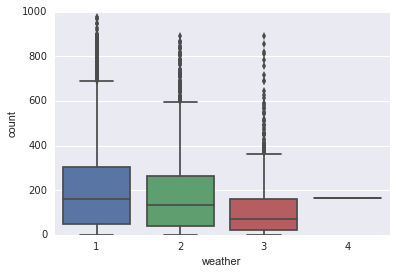

In [130]:
boxplot_count('weather')

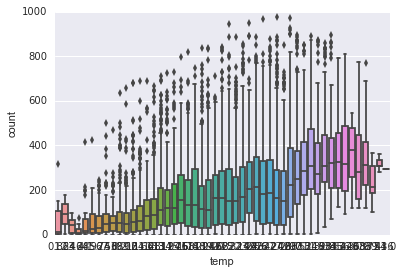

In [131]:
boxplot_count('temp')

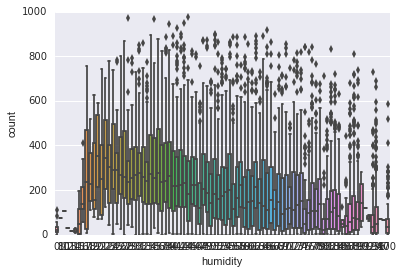

In [132]:
boxplot_count('humidity')

In [133]:
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [134]:
def apply_model(model, data, predictors, outcome):
    kf = KFold(data[outcome].shape[0], n_folds=10)
    
    scores = []
    
    for train, val in kf:
        x_train = data[predictors].iloc[train, :]
        x_val = data[predictors].iloc[val, :]
        y_train = data[outcome].iloc[train, :]
        y_val = data[outcome].iloc[val, :]
        
        x_train = (data[predictors].iloc[train,:])
        y_train = (data[outcome].iloc[train,:])
        x_val = (data[predictors].iloc[val,:])
        y_val = (data[outcome].iloc[val,:])        
        
        model = model.fit(x_train, y_train)
        scores.append(model.score(x_val, y_val))
        
    print 'Cross-validation scores %s' % '{0:.3}'.format(np.mean(scores))
    return (np.abs(np.mean(scores)))

In [135]:
def choose_iter(elements, length):
    for i in xrange(len(elements)):
        if length == 1:
            yield [elements[i],]
        else:
            for next in choose_iter(elements[i+1:len(elements)], length-1):
                yield [elements[i],] + next

In [136]:
predictors = comb_final.columns
outcome = ['count']

best_scores = {}

for i in range(len(predictors)):
    for pred in list(choose_iter(predictors,i)):
        # Base classification using Random Forest
        model = DecisionTreeRegressor()
        print (pred)
        best_scores[''.join(pred)] = apply_model(model, train_final, pred, outcome)

['season']
Cross-validation scores -0.388
['workingday']
Cross-validation scores -0.663
['weather']
Cross-validation scores -0.648
['temp']
Cross-validation scores -0.108
['humidity']
Cross-validation scores -0.893
['windspeed']
Cross-validation scores -0.712
['hour']
Cross-validation scores -0.346
['season', 'workingday']
Cross-validation scores -0.391
['season', 'weather']
Cross-validation scores -0.375
['season', 'temp']
Cross-validation scores -0.151
['season', 'humidity']
Cross-validation scores -0.386
['season', 'windspeed']
Cross-validation scores -0.42
['season', 'hour']
Cross-validation scores 0.066
['workingday', 'weather']
Cross-validation scores -0.65
['workingday', 'temp']
Cross-validation scores -0.129
['workingday', 'humidity']
Cross-validation scores -0.901
['workingday', 'windspeed']
Cross-validation scores -0.735
['workingday', 'hour']
Cross-validation scores -0.245
['weather', 'temp']
Cross-validation scores -0.127
['weather', 'humidity']
Cross-validation scores -0.9

In [137]:
from operator import itemgetter

best_score_list = sorted(best_scores.items(), key=itemgetter(1))

In [138]:
best_score_list

[('seasontemphour', 0.016218038411317505),
 ('seasonworkingdaywindspeedhour', 0.0258446697869965),
 ('seasonworkingdayweatherwindspeedhour', 0.055487427096915565),
 ('workingdaytempwindspeedhour', 0.061971837776125173),
 ('seasonworkingdaytempwindspeedhour', 0.063451395526732096),
 ('seasonhour', 0.065998887558749525),
 ('workingdaytemphumiditywindspeedhour', 0.071275386935317112),
 ('seasonweathertemphour', 0.078510566358757541),
 ('workingdayweathertempwindspeedhour', 0.079833027751144675),
 ('seasonweatherhour', 0.082937671259970661),
 ('workingdayweathertemphumidityhour', 0.094925386423733202),
 ('seasonworkingdayweatherhumidityhour', 0.10333514590587141),
 ('workingdaytemphumidityhour', 0.10443016324677132),
 ('temp', 0.10780197924055879),
 ('workingdayweathertemphumiditywindspeedhour', 0.108043643887763),
 ('seasonworkingdayhumidityhour', 0.11260486177905096),
 ('seasonworkingdaytemphumidityhour', 0.11471146291530476),
 ('seasonwindspeedhour', 0.11912774921835378),
 ('seasonworki

In [139]:
best_predictors = ['season', 'workingday', 'weather', 'windspeed', 'hour']
x_train_best = comb_final[best_predictors].iloc[:train.shape[0], :]
x_test_best = comb_final[best_predictors].iloc[train.shape[0]:, :]

In [140]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
 
names = ["AdaBoost", 
         "RandomForestRegressor", 
         "GradientBoostingRegressor",
         "KNeighborsRegressor",
         "SVR"
        ]
 
regs = [
    AdaBoostRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    SVR()
]

In [141]:
best_models = {}

for name, reg in zip(names, regs):
    best_models[name] = apply_model(reg, train_final, best_predictors, outcome)

print sorted(best_models.items(), key=itemgetter(1))

Cross-validation scores -0.608
Cross-validation scores 0.0643
Cross-validation scores 0.195
Cross-validation scores 0.0274
Cross-validation scores 0.0385
[('KNeighborsRegressor', 0.027434668990763567), ('SVR', 0.038458494220241335), ('RandomForestRegressor', 0.064300199264451643), ('GradientBoostingRegressor', 0.19504631647263862), ('AdaBoost', 0.60778896104788716)]


In [142]:
from sklearn.grid_search import GridSearchCV

def apply_grid_search(model, params):
    grid_search = GridSearchCV(model, param_grid=params)
    grid_search.fit(x_train_best, y_train)
    return grid_search.best_estimator_

In [143]:
model_RF = RandomForestRegressor()
parameter_grid_RF = {'n_estimators': [10, 30, 50, 100, 150, 200],
                     "max_depth": [3, None],
                     "max_features": ['auto', 'sqrt',  'log2']
                    }
best_RF = apply_grid_search(model_RF, parameter_grid_RF)

In [144]:
model_ADA = AdaBoostRegressor()
parameter_grid_ADA = {'n_estimators': [10, 50, 100, 150, 200],
                     "learning_rate": [1, 2],
                     "loss": ['linear', 'square', 'exponential']
                    }
best_ADA = apply_grid_search(model_ADA, parameter_grid_ADA)

In [145]:
def print_result(model, name):
    print model
    model = model.fit(x_train_best, y_train)
    y_test = np.ceil(np.abs(model.predict(x_test_best)))
    result = test[['datetime']]
    result.loc[:,'count'] = y_test
    result.to_csv(''.join([name, '.csv']), index=False)

In [150]:
print_result(SVR(), 'SVR default')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [146]:
print_result(best_RF, 'Random Forest with turning parameters')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [147]:
print_result(best_ADA, 'Adaboost with turning parameters')

AdaBoostRegressor(base_estimator=None, learning_rate=2, loss='linear',
         n_estimators=10, random_state=None)


In [148]:
importances = best_RF.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(len(best_predictors)):
    print("%d. feature %s (%f)" % (i + 1, best_predictors[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature hour (0.725664)
2. feature season (0.093556)
3. feature windspeed (0.092615)
4. feature workingday (0.053394)
5. feature weather (0.034772)


In [149]:
best_predictors[0]

'season'